C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


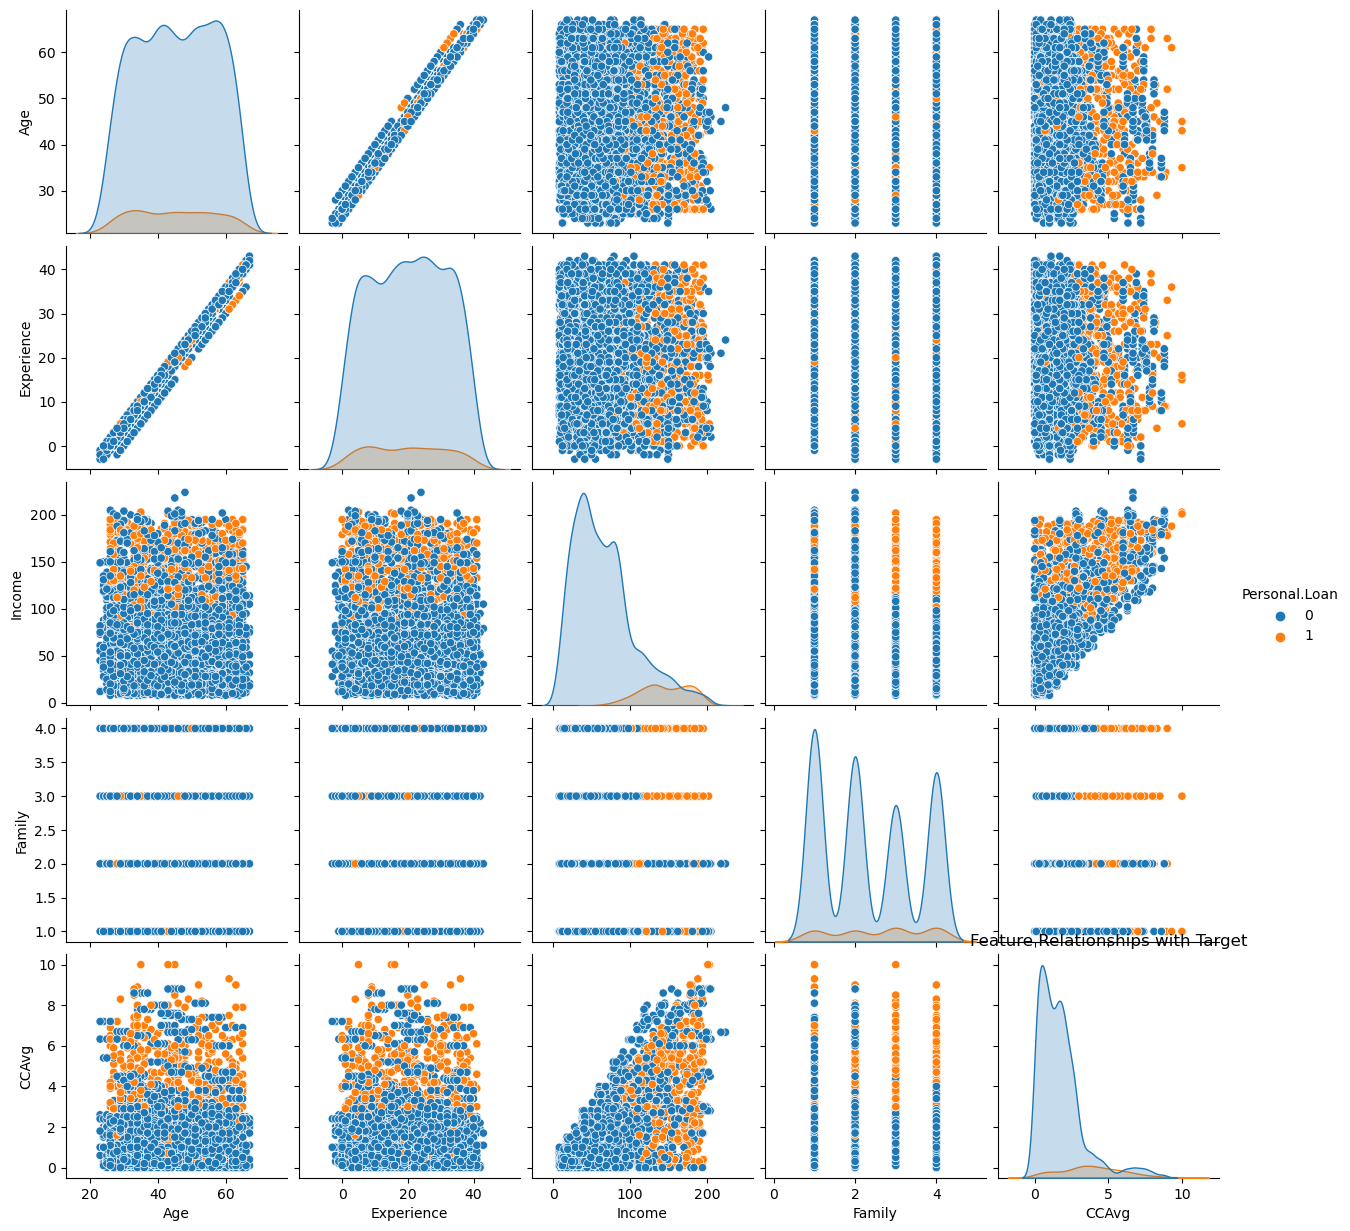

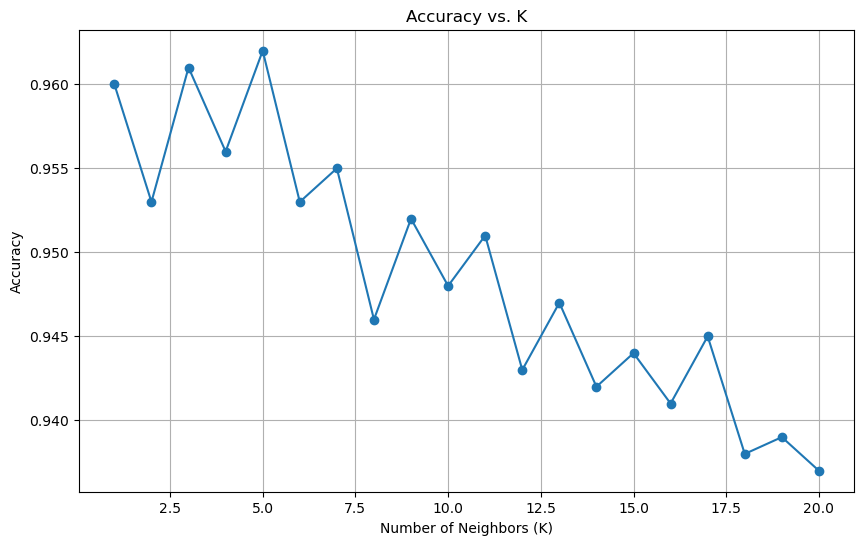

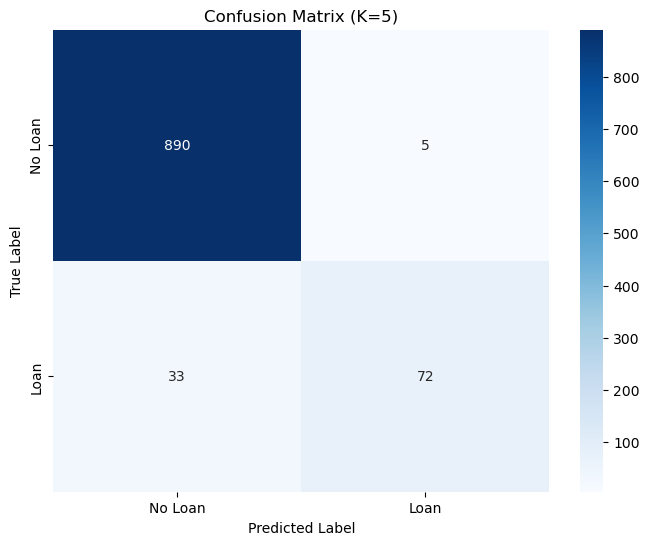

Optimal K: 5
Accuracy: 0.962

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.94      0.69      0.79       105

    accuracy                           0.96      1000
   macro avg       0.95      0.84      0.89      1000
weighted avg       0.96      0.96      0.96      1000



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
data = pd.read_csv('House_Price.csv')

# Pair plot for feature visualization
sns.pairplot(data, vars=['Age', 'Experience', 'Income', 'Family', 'CCAvg'], hue='Personal.Loan', diag_kind='kde')
plt.title("Feature Relationships with Target")
plt.show()

# Prepare features and target
X = data.drop(columns=['ID', 'ZIP.Code', 'Personal.Loan'])
y = data['Personal.Loan']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN classifier
k_values = range(1, 21)  # Testing k from 1 to 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot Accuracy vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs. K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Final model with best k
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.title(f"Confusion Matrix (K={optimal_k})")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print evaluation metrics
print(f"Optimal K: {optimal_k}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
